In [6]:
import os
import sys
import csv
import numpy as np
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.ndimage import gaussian_filter1d
import copy

# Alignment of upper camera and lower camera
1. note that indices in Fiji starts from 1 and in python from zero
2. The lower bound for upper camera indices are reported here. lowcam_start at 121 means the last frame of upper 
camera that is stable befor start of low camera is number 122
3. diff_up_low_label: difference in second between starting labels of uppe camera and lower camera

In [10]:
# for movie 0917RIM odor starts at 300 sec

lamp_on_upper= 328#frame 329 on Fiji is the first one with increased illumination due to light on
lamp_on_lower= 105#frame 106 in Fiji in nd2 is the first with light on
lamp_off_upper= 337#frame 338 on Fiji is the last one with lamp on
lamp_off_lower = 109.5
lowcam_start = 151717
uppercam_start = 151650
#111:controler start, 121:lower camera start
diff_up_low_label = 27#difference in second between starting labels of upper camera and lower camera
lowcam_start_up = 121
lowCam_stop_up = 12599
lowCam_stop_low = 6299
Frame_interval = 0.49548

In [11]:
fps = 4#?

In [13]:
Total_lowcam_frame = 6300


In [14]:
csv_data=np.zeros((Total_lowcam_frame,23))

# save the odor label of each time point in lower camera (odor on = 1, else=0)

In [15]:
delay=0
for t in range(Total_lowcam_frame):
    timestamp = t*Frame_interval
    if timestamp < 300:
        csv_data[t,10] = 0
    elif timestamp <  780:
        if (timestamp%60) < 20:
            csv_data[t,10] = 1
        else:
            csv_data[t,10] = 0
    elif timestamp <  1080:   
        csv_data[t,10] = 0
        
    elif timestamp <  1560:         
        if (timestamp%60) < 20:
            csv_data[t,10] = 2
        else:
            csv_data[t,10] = 0
    elif timestamp <  1860:   
        csv_data[t,10] = 0  
    elif timestamp <  2340:         
        if (timestamp%60) < 20:
            csv_data[t,10] = 1
        else:
            csv_data[t,10] = 0   
    elif timestamp <  2640: 
        csv_data[t,10] = 0
    elif timestamp <  3120:         
        if (timestamp%60) < 20:
            csv_data[t,10] = 2
        else:
            csv_data[t,10] = 0   
            

In [18]:
timestamp=np.zeros((Total_lowcam_frame))

for t in range(Total_lowcam_frame):
    timestamp[t] = t*Frame_interval
delta_t = timestamp[1:]-timestamp[:-1]
delta_t = timestamp[1:]-timestamp[:-1]

0
(array([], dtype=int64),)


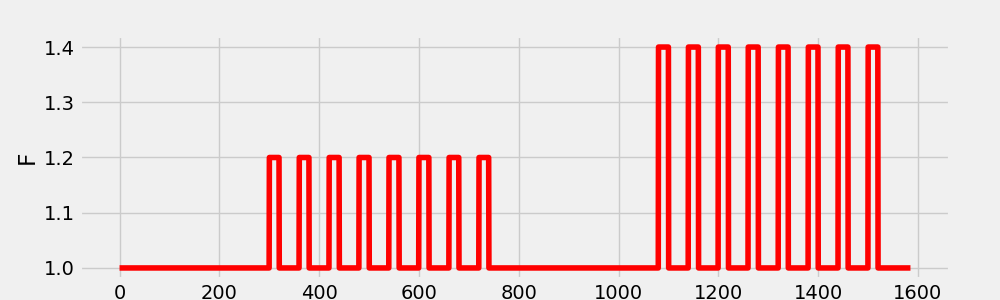

In [25]:
%matplotlib widget
style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
st,end = 000,3200
neur  = 5
nonz= np.nonzero(csv_data[st:end,neur])[0]
#ax.scatter(timestamp[nonz],csv_data[nonz,5])
#ax.scatter(timestamp[nonz],0.3*csv_data[nonz,10]+1,c='r')
ax.scatter(timestamp[st+nonz],csv_data[st+nonz,neur])
ax.plot(timestamp[st+np.arange(len(csv_data[st:end,10]))],0.2*csv_data[st:end,10]+1,c='r')
plt.xlabel('T')
plt.ylabel('F')

print(np.sum(delta_t>1))
print(np.nonzero(delta_t>1))
plt.grid(True)

plt.show()

0
(array([], dtype=int64),)


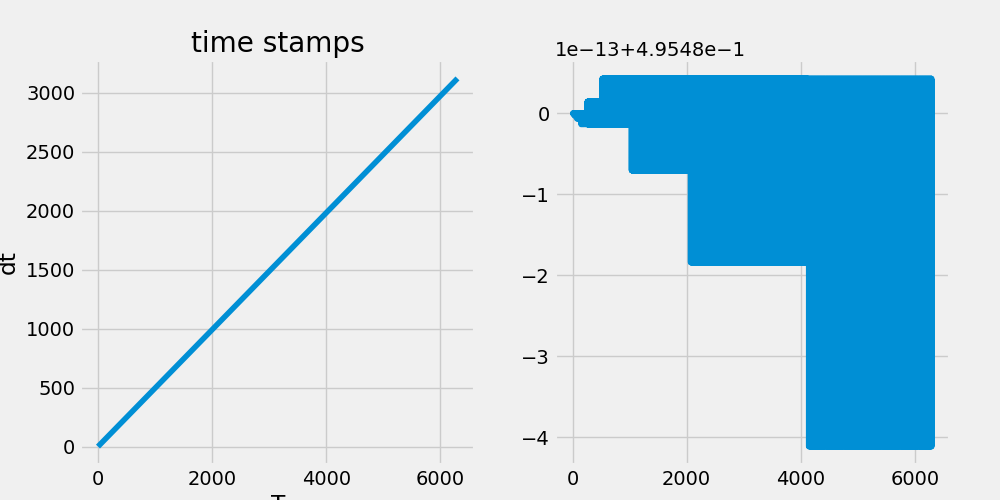

In [27]:
%matplotlib widget
style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(timestamp)

plt.xlabel('T')
plt.ylabel('dt')
plt.title('time stamps')
ax2 = fig.add_subplot(122)
#ax2.hist(delta_t[delta_t>1],40)
ax2.plot(delta_t)
ax2.scatter(np.nonzero(delta_t>1)[0],delta_t[np.nonzero(delta_t>1)[0]],c='r')
print(np.sum(delta_t>1))
print(np.nonzero(delta_t>1))
plt.grid(True)

plt.show()

## Compute the correspondence between lower and upper camera

In [28]:
bottom_cam = [lamp_on_lower,lamp_off_lower,lowCam_stop_low]
top_cam = [lamp_on_upper,lamp_off_upper,lowCam_stop_up]
a, b = np.polyfit(bottom_cam, top_cam, 1)
print(a)
print(b)

1.9811038957240699
120.02659173375483


In [30]:
slope = (lamp_on_upper-lamp_off_upper)/(lamp_on_lower-lamp_off_lower)
BB = lamp_off_upper-slope*lamp_off_lower
print(slope)
print(BB)

2.0
118.0


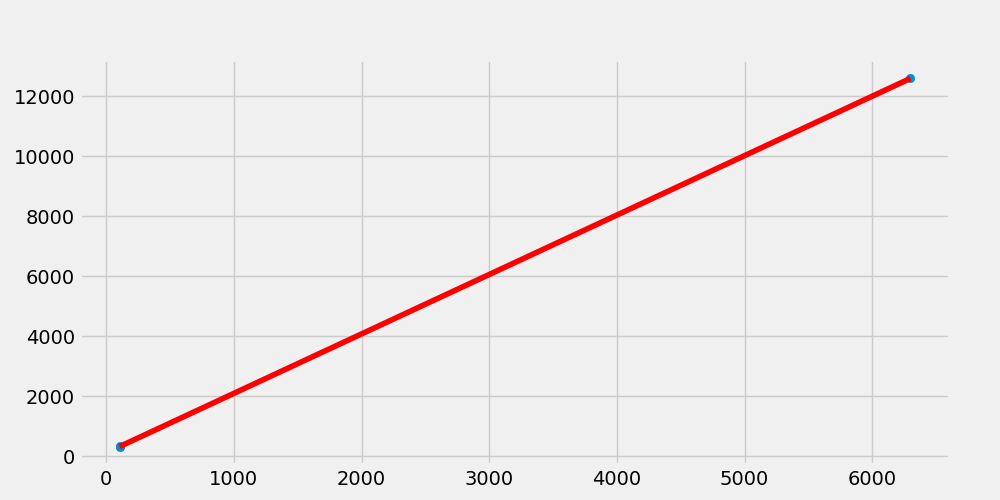

In [31]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(bottom_cam, top_cam)
p = a*np.array(bottom_cam)+b
plt.plot(bottom_cam, p, color ="r")
plt.show()

In [33]:
#saves the correspondence between lower camera and upper camera indext in the csv file
for t in range(0,(Total_lowcam_frame)):#h_time.attrs["T"]):
    if t > 200 and t < 300:
        print(str(t)+"   "+str(np.round(a*t+b)))
    csv_data[t,11] = int(np.round(a*t+b))     
        
    

201   518.0
202   520.0
203   522.0
204   524.0
205   526.0
206   528.0
207   530.0
208   532.0
209   534.0
210   536.0
211   538.0
212   540.0
213   542.0
214   544.0
215   546.0
216   548.0
217   550.0
218   552.0
219   554.0
220   556.0
221   558.0
222   560.0
223   562.0
224   564.0
225   566.0
226   568.0
227   570.0
228   572.0
229   574.0
230   576.0
231   578.0
232   580.0
233   582.0
234   584.0
235   586.0
236   588.0
237   590.0
238   592.0
239   594.0
240   595.0
241   597.0
242   599.0
243   601.0
244   603.0
245   605.0
246   607.0
247   609.0
248   611.0
249   613.0
250   615.0
251   617.0
252   619.0
253   621.0
254   623.0
255   625.0
256   627.0
257   629.0
258   631.0
259   633.0
260   635.0
261   637.0
262   639.0
263   641.0
264   643.0
265   645.0
266   647.0
267   649.0
268   651.0
269   653.0
270   655.0
271   657.0
272   659.0
273   661.0
274   663.0
275   665.0
276   667.0
277   669.0
278   671.0
279   673.0
280   675.0
281   677.0
282   679.0
283   681.0
284 

maybe the exact 3 sec difference between the start of lower camera and the time written is correct. why does the start of lower camera matches exactly with the time stamp difference?

In [34]:
csv_data[0,11] 

120.0

In [35]:
csv_file_path_ind = '/mnt/DATA/Mahsa/movies/LongRecordings/2024-09-17/W2tq9262/data_RIM_0917.csv'
df = pd.DataFrame(csv_data)
df.to_csv(csv_file_path_ind , index=False, na_rep='NA')

In [37]:
df = pd.read_csv(csv_file_path_ind, header=None)